In [19]:
import pandas as pd
import seaborn as sns 
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [21]:

data = pd.read_csv("Airline_Dataset.csv")

data = data.rename(columns={
    'Gender': 'Gender',
    'Customer Type': 'Customer_Type',
    'Type of Travel': 'Type_of_Travel',
    'Class': 'Class',
    'Satisfaction': 'Satisfaction',
    'id': 'ID',
    'Age': 'Age',
    'Flight Distance': 'Flight_Distance',
    'Departure/Arrival time convenient': 'Departure_Arrival_time_convenient',
    'Ease of Online booking': 'Ease_of_Online_booking',
    'Gate location': 'Gate_location',
    'Departure Delay in Minutes': 'Departure_Delay_in_Minutes',
    'Arrival Delay in Minutes': 'Arrival_Delay_in_Minutes',
    'Inflight wifi service': 'Inflight_wifi_service',
    'Food and drink': 'Food_and_drink',
    'Online boarding': 'Online_boarding',
    'Seat comfort': 'Seat_comfort',
    'Inflight entertainment': 'Inflight_entertainment',
    'On-board service': 'On_board_service',
    'Leg room service': 'Leg_room_service',
    'Baggage handling': 'Baggage_handling',
    'Checkin service': 'Checkin_service',
    'Inflight service': 'Inflight_service',
    'Cleanliness': 'Cleanliness'

})

data = data.dropna()


data['Total_Delay'] = data['Departure_Delay_in_Minutes'] + data['Arrival_Delay_in_Minutes']
data=data.drop(['Departure_Delay_in_Minutes'], axis=1)
data=data.drop(['Arrival_Delay_in_Minutes'], axis=1)

data['Satisfaction'] = data['Satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

groundT =data['Satisfaction']
data=data.drop(['Satisfaction'], axis=1)
data=data.drop(['ID'], axis=1)

data = pd.get_dummies(data, columns=['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'])

data.to_csv("donnees_nettoyees.cvs", index=False)
data.describe()


,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,...,Total_Delay,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,...,29.734514,0.507410,0.492590,0.816862,0.183138,0.690764,0.309236,0.478735,0.448825,0.072440
std,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,...,75.732722,0.499947,0.499947,0.386781,0.386781,0.462180,0.462180,0.499550,0.497376,0.259216
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,...,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,...,24.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,3176.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
groundT.head()


0    0
1    0
2    1
3    0
4    1
Name: Satisfaction, dtype: int64

                                        Age  Flight_Distance  \
Age                                1.000000         0.099863   
Flight_Distance                    0.099863         1.000000   
Inflight_wifi_service              0.015779         0.006554   
Departure_Arrival_time_convenient  0.036780        -0.018901   
Ease_of_Online_booking             0.022294         0.064959   
Gate_location                     -0.000709         0.005378   
Food_and_drink                     0.023283         0.057136   
Online_boarding                    0.207485         0.215082   
Seat_comfort                       0.159229         0.157825   
Inflight_entertainment             0.074990         0.130518   
On_board_service                   0.056743         0.111224   
Leg_room_service                   0.038992         0.134548   
Baggage_handling                  -0.048192         0.064810   
Checkin_service                    0.033182         0.073635   
Inflight_service                  -0.051

<Axes: >

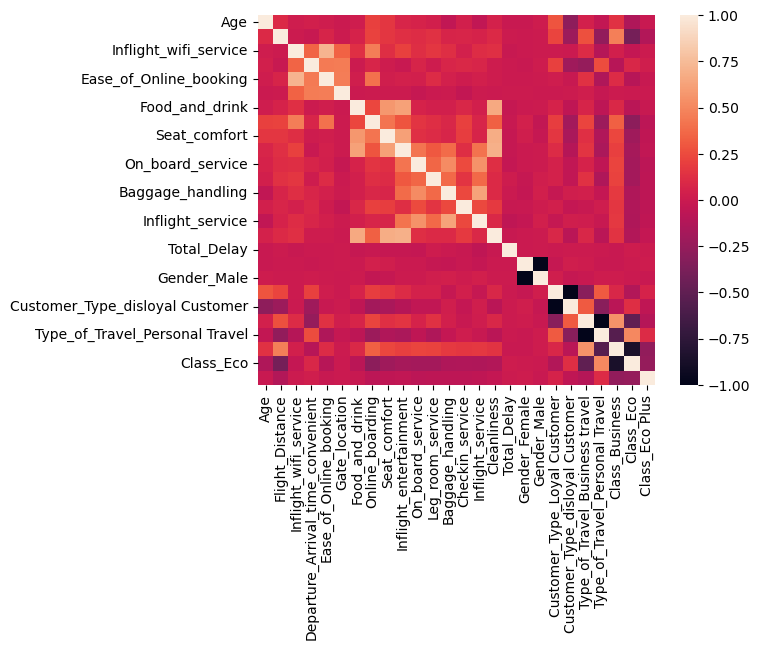

In [4]:
correlation_matrix = data.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = data
y = groundT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 83.63%


c:\Users\briac\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
import pandas as pd
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split

data = pd.read_csv("donnees_nettoyees.cvs")

X = data
y = groundT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=1500, learning_rate=0.1, depth=8,  loss_function='Logloss', verbose=100)

model.fit(X_train, y_train, verbose=100)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


0:	learn: 0.5459521	total: 147ms	remaining: 3m 39s
100:	learn: 0.0808293	total: 2.01s	remaining: 27.9s
200:	learn: 0.0675261	total: 3.93s	remaining: 25.4s
300:	learn: 0.0594374	total: 5.71s	remaining: 22.7s
400:	learn: 0.0531156	total: 7.25s	remaining: 19.9s
500:	learn: 0.0484298	total: 8.75s	remaining: 17.5s
600:	learn: 0.0438239	total: 10.6s	remaining: 15.8s
700:	learn: 0.0398630	total: 12.3s	remaining: 14.1s
800:	learn: 0.0367302	total: 14s	remaining: 12.2s
900:	learn: 0.0337684	total: 15.5s	remaining: 10.3s
1000:	learn: 0.0313596	total: 16.9s	remaining: 8.44s
1100:	learn: 0.0303378	total: 18.1s	remaining: 6.56s
1200:	learn: 0.0280301	total: 19.6s	remaining: 4.88s
1300:	learn: 0.0258483	total: 21s	remaining: 3.21s
1400:	learn: 0.0240031	total: 22.6s	remaining: 1.59s
1499:	learn: 0.0224990	total: 24s	remaining: 0us
Accuracy: 96.31%


In [7]:
# recherche en random
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1": [],
    "AUC-ROC": [],
    "Confusion Matrix": []
}


# # Définir la distribution des paramètres à échantillonner
# param_dist = {
#     'iterations': stats.randint(100, 2000),
#     'learning_rate': stats.uniform(0.01, 0.3),
#     'depth': stats.randint(6, 12),
# }

# catboost = CatBoostClassifier()

# random_search = RandomizedSearchCV(catboost, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy')
# random_search.fit(X_train, y_train)

# print("Meilleurs paramètres trouvés : ", random_search.best_params_)

# best_catboost = random_search.best_estimator_
# best_catboost.fit(X_train, y_train)

In [45]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import GridSearchCV
# catboost = CatBoostClassifier(task_type='GPU')

# param_grid = {
#     'iterations': [300,400, 500, 600,700, 800, 900, 1000, 1100, 1200, 1300, 1400],
#     'learning_rate': [ 0.015,0.1, 0.05, 0.2, 0.25, 0.17, 0,13, 0.08, 0.03 ],
#     'depth': [8, 7, 6, 5, 4, 9, 10, 11, 12]
# }


# grid_search = GridSearchCV(catboost, param_grid, cv=5 scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print("Meilleurs paramètres trouvés : ", grid_search.best_params_)
# best_catboost2 = grid_search.best_estimator_
# print (grid_search.best_estimator_)
# best_catboost2.fit(X_train, y_train)


In [9]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import GridSearchCV
# catboost = CatBoostClassifier(task_type='GPU', verbose=100)

# param_grid = {
#     'iterations': [600,700, 800],
#     'learning_rate': [ 0.015 ,0.1, 0.05],
#     'depth': [8,7,6],
# }


# grid_search = GridSearchCV(catboost, param_grid, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print("Meilleurs paramètres trouvés : ", grid_search.best_params_)
# best_catboost2 = grid_search.best_estimator_
# print (grid_search.best_estimator_)
# best_catboost2.fit(X_train, y_train)

0:	learn: 0.6674901	total: 18.9ms	remaining: 11.3s
100:	learn: 0.1394941	total: 910ms	remaining: 4.5s
200:	learn: 0.1107865	total: 1.8s	remaining: 3.57s
300:	learn: 0.0986824	total: 2.68s	remaining: 2.66s
400:	learn: 0.0918703	total: 3.58s	remaining: 1.78s
500:	learn: 0.0869597	total: 4.51s	remaining: 891ms
599:	learn: 0.0828907	total: 5.38s	remaining: 0us
0:	learn: 0.6673270	total: 11.3ms	remaining: 6.78s
100:	learn: 0.1387195	total: 900ms	remaining: 4.45s
200:	learn: 0.1114210	total: 1.76s	remaining: 3.5s
300:	learn: 0.0988992	total: 2.66s	remaining: 2.64s
400:	learn: 0.0919290	total: 3.52s	remaining: 1.75s
500:	learn: 0.0866444	total: 4.42s	remaining: 873ms
599:	learn: 0.0825287	total: 5.26s	remaining: 0us
0:	learn: 0.6673014	total: 9.76ms	remaining: 5.84s
100:	learn: 0.1384362	total: 903ms	remaining: 4.46s
200:	learn: 0.1117889	total: 1.78s	remaining: 3.54s
300:	learn: 0.0984285	total: 2.65s	remaining: 2.63s
400:	learn: 0.0907446	total: 3.52s	remaining: 1.75s
500:	learn: 0.0856078	

In [ ]:
# 653 8 0.05

In [44]:

best_params = {
    'depth': 8,
    'iterations': 653,
    'learning_rate': 0.05
}

best_catboost_model = CatBoostClassifier(verbose=False, **best_params)

best_catboost_model.fit(X_train, y_train)

y_pred = best_catboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, best_catboost_model.predict_proba(X_test)[:, 1])
cm = confusion_matrix(y_test, y_pred)

results["Model"].append("CatBoost8 (Best Parameters)")
results["Accuracy"].append(accuracy)
results["Precision"].append(precision)
results["Recall"].append(recall)
results["F1"].append(f1)
results["AUC-ROC"].append(auc_roc)
results["Confusion Matrix"].append(cm)

results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by="AUC-ROC", ascending=False)

print(results_df)

                          Model  Accuracy  Precision    Recall        F1  \
21  CatBoost8 (Best Parameters)  0.964939   0.972187  0.946215  0.959025   
15  CatBoost6 (Best Parameters)  0.964939   0.972187  0.946215  0.959025   
17  CatBoost7 (Best Parameters)  0.964862   0.971922  0.946305  0.958942   
16  CatBoost7 (Best Parameters)  0.964824   0.972006  0.946126  0.958892   
18  CatBoost7 (Best Parameters)  0.965248   0.972985  0.946126  0.959368   
12  CatBoost4 (Best Parameters)  0.964862   0.971922  0.946305  0.958942   
4    CatBoost (Best Parameters)  0.964862   0.971922  0.946305  0.958942   
5    CatBoost (Best Parameters)  0.964862   0.971922  0.946305  0.958942   
8   CatBoost4 (Best Parameters)  0.964862   0.971922  0.946305  0.958942   
14  CatBoost5 (Best Parameters)  0.964785   0.971486  0.946572  0.958867   
11  CatBoost2 (Best Parameters)  0.964592   0.972164  0.945414  0.958602   
7   CatBoost2 (Best Parameters)  0.964592   0.972164  0.945414  0.958602   
2    CatBoos

In [56]:
import pandas as pd
from catboost import CatBoostClassifier
from catboost import CatBoostClassifier

def predict_satisfaction(model, donnees_passager, valeurs_par_defaut=None):
    """
    Prédit la satisfaction du passager en utilisant un modèle CatBoost.

    Args:
        model (CatBoostClassifier): Le modèle CatBoost entraîné.
        donnees_passager (dict): Un dictionnaire contenant les données du passager pour faire les prédictions.
        valeurs_par_defaut (dict, optionnel): Un dictionnaire contenant les valeurs par défaut pour les données manquantes.
        # est ce que je le rajoute ou pas 

    Returns:
        int: Satisfaction prédite (0 pour non satisfait, 1 pour satisfait).
    """
    if valeurs_par_defaut is not None:
        for cle, valeur in valeurs_par_defaut.items():
            if cle not in donnees_passager:
                donnees_passager[cle] = valeur

    donnees_entree = pd.DataFrame(donnees_passager, index=[0])

    prediction = model.predict(donnees_entree)

    return prediction[0]

donnees_passager = {}
resultat = predict_satisfaction(best_catboost_model, donnees_passager)


CatBoostError: Input data must have at least one feature

In [27]:
# results_df.drop(results_df.index)

In [53]:
# Sauvegarder le modèle dans un fichier
best_catboost_model.save_model("meilleur_modele_catboost.model")


In [54]:
loaded_model = CatBoostClassifier()
loaded_model.load_model("meilleur_modele_catboost.model")

# Utilisez loaded_model pour effectuer des prédictions
y_pred_loaded = loaded_model.predict(X_test)


In [48]:
import streamlit as st
import pandas as pd
from catboost import CatBoostClassifier
import matplotlib as plt 

best_params = {
    'depth': 8,
    'iterations': 653,
    'learning_rate': 0.05
}
best_catboost_model = CatBoostClassifier(verbose=False, **best_params)

data = data

st.title("Prédiction de la satisfaction des clients")

st.sidebar.header("Données du client")

gender = st.sidebar.selectbox("Genre du client", ["Féminin", "Masculin"])
customer_type = st.sidebar.selectbox("Type de client", ["Déloyal", "Loyal"])
type_of_travel = st.sidebar.selectbox("Type de voyage", ["Voyage personnel", "Voyage d'affaires"])
class_type = st.sidebar.selectbox("Classe du vol", ["Économique", "Affaires"])
age = st.sidebar.number_input("Âge du client", min_value=0, max_value=100, value=30)
flight_distance = st.sidebar.number_input("Distance du vol en km", min_value=0, value=500)
online_boarding = st.sidebar.number_input("Note d'embarquement en ligne (0-5)", min_value=0, max_value=5, value=3)
seat_comfort = st.sidebar.number_input("Confort du siège (0-5)", min_value=0, max_value=5, value=3)
inflight_wifi_service = st.sidebar.number_input("Service Wi-Fi en vol (0-5)", min_value=0, max_value=5, value=3)

if st.sidebar.button("Prédire la satisfaction du client"):
    gender_mapping = {"Féminin": 0, "Masculin": 1}
    customer_type_mapping = {"Déloyal": 0, "Loyal": 1}
    type_of_travel_mapping = {"Voyage personnel": 0, "Voyage d'affaires": 1}
    class_type_mapping = {"Économique": 0, "Affaires": 1}
    
    client_data = pd.DataFrame({
        'Gender': [gender_mapping[gender]],
        'Customer_Type': [customer_type_mapping[customer_type]],
        'Type_of_Travel': [type_of_travel_mapping[type_of_travel]],
        'Class': [class_type_mapping[class_type]],
        'Age': [age],
        'Flight_Distance': [flight_distance],
        'Online_boarding': [online_boarding],
        'Seat_comfort': [seat_comfort],
        'Inflight_wifi_service': [inflight_wifi_service]
    })

    satisfaction_prediction = best_catboost_model.predict(client_data)
    
    if satisfaction_prediction[0] == 1:
        st.sidebar.success("Le client sera satisfait.")
    else:
        st.sidebar.error("Le client ne sera pas satisfait.")
    
    proba_labels = ["Insatisfait", "Satisfait"]
    proba_values = proba[0]
    st.write("Probabilités de satisfaction :")
    st.bar_chart({proba_labels[i]: proba_values[i] for i in range(len(proba_labels))})


2023-11-03 11:55:04.123 
  command:

    streamlit run C:\Users\briac\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
